**Author: Fizza Kashif**

**ID: STU-DS-251-242**

# **Final Capstone Project**
# **SpaceX First Stage Landing Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# **Data Collection**

# **Using SpaceX REST API**

In [ ]:
import requests

spacex_url="https://api.spacexdata.com/v5/launches"


response=requests.get(spacex_url)
response.status_code

200

In [ ]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [ ]:
# Use json_normalize meethod to convert the json result into a dataframe
data = pd.json_normalize(response.json())

In [ ]:
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


Helper functions

In [ ]:
BoosterVersion = []

def getBoosterVersion(data):
    for rocket_id in data['rocket']:
        url = "https://api.spacexdata.com/v4/rockets/" + rocket_id
        response = requests.get(url).json()
        BoosterVersion.append(response['name'])


In [ ]:
Longitude = []
Latitude = []
LaunchSite = []

def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [ ]:
PayloadMass = []
Orbit = []

def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [ ]:
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []

def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [ ]:
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
getPayloadData(data)

In [ ]:
getCoreData(data)

In [ ]:
getLaunchSite(data)

In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [ ]:
for k,v in launch_dict.items():
    print(k, len(v))


FlightNumber 94
Date 94
BoosterVersion 94
PayloadMass 94
Orbit 94
LaunchSite 94
Outcome 94
Flights 94
GridFins 94
Reused 94
Legs 94
LandingPad 94
Block 94
ReusedCount 94
Serial 94
Longitude 94
Latitude 94


In [ ]:
# Create a data from launch_dict
data_launch = pd.DataFrame.from_dict(launch_dict)

In [ ]:
# Show the head of the dataframe
data_launch.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [ ]:
data_falcon9 = data_launch[data_launch['BoosterVersion'] == 'Falcon 9'].copy()

In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


**Data Wrangling**

In [ ]:
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,5
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
#replace null values with the mean
data_falcon9['PayloadMass'] = data_falcon9['PayloadMass'].fillna(data_falcon9['PayloadMass'].mean())


In [ ]:
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
data_falcon9.to_csv('Data_from_api.csv', index=False)

# **Using web scraping from wikipedia (List of Falcon 9 and Falcon Heavy Launches)**

In [ ]:
!pip3 install beautifulsoup4
!pip3 install requests

In [ ]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata

In [ ]:
def date_time(table_cells):
    parts = list(table_cells.stripped_strings)
    return parts[:2]

def booster_version(table_cells):
    parts = list(table_cells.stripped_strings)
    return " ".join(parts[:-1])

def landing_status(table_cells):
    return next(table_cells.stripped_strings, None)

def get_mass(table_cells):
    text = unicodedata.normalize("NFKD", table_cells.get_text(strip=True))
    if "kg" in text:
        return text.split("kg")[0].strip() + " kg"
    return "0"

def extract_column_from_header(row):
    # Remove unwanted tags
    for tag in ["br", "a", "sup"]:
        for t in row.find_all(tag):
            t.extract()

    col_name = row.get_text(" ", strip=True)

    return col_name if col_name and not col_name.isdigit() else None



In [ ]:
static_url="https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"

In [ ]:
data = requests.get(static_url)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}
response = requests.get(static_url, headers=headers)

print("Status Code:", response.status_code)

Status Code: 200


In [ ]:
# Use BeautifulSoup() to create a BeautifulSoup object from a response text content
soup = BeautifulSoup(response.text, 'html5lib')


In [ ]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [ ]:
table_1=soup.find_all('table')

In [ ]:
first_launch =table_1 [2]
print(first_launch)

<table class="wikitable plainrowheaders collapsible sticky-header" id="2025ytd" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>booster</a><sup class="reference" id="cite_ref-booster_32-1"><a href="#cite_note-booster-32"><span class="cite-bracket">[</span>i<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch<br/>site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_33-1"><a href="#cite_note-Dragon-33"><span class="cite-bracket">[</span>j<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage

In [ ]:
column_names = [
    extract_column_from_header(th)
    for th in first_launch.find_all("th")
    if extract_column_from_header(th)
]


In [ ]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [ ]:
if "Date and time ( )" in column_names:
    column_names.remove("Date and time ( )")
#drop the irrelevant columns

In [ ]:
launch_dict = {
    'Flight No.': [],
    'Date': [],
    'Time': [],
    'Version Booster': [],
    'Launch site': [],
    'Payload': [],
    'Payload mass': [],
    'Orbit': [],
    'Customer': [],
    'Launch outcome': [],
    'Booster landing': []
}


In [ ]:
extracted_row = 0
for table_number, table in enumerate(
    soup.find_all('table', class_="wikitable plainrowheaders collapsible sticky-header")
):
    for rows in table.find_all("tr"):

        row = rows.find_all('td')
        if rows.th:
            flight_number = rows.th.get_text(strip=True)
            if flight_number.isdigit() and len(row) >= 9:
                extracted_row += 1

                # Flight No.
                launch_dict['Flight No.'].append(int(flight_number))

                # Date & Time
                datatimelist = date_time(row[0])   # returns [date, time]
                launch_dict['Date'].append(
                    datatimelist[0].strip(',') if datatimelist else None
                )
                launch_dict['Time'].append(
                    datatimelist[1] if len(datatimelist) > 1 else None
                )

                # Booster Version
                bv = booster_version(row[1])
                if not bv and row[1].a:
                    bv = row[1].a.get_text(strip=True)
                launch_dict['Version Booster'].append(bv)

                # Launch Site
                launch_dict['Launch site'].append(
                    row[2].a.get_text(strip=True) if row[2].a else None
                )

                # Payload
                launch_dict['Payload'].append(
                    row[3].a.get_text(strip=True) if row[3].a else None
                )
                # Payload Mass
                launch_dict['Payload mass'].append(get_mass(row[4]))

                # Orbit
                launch_dict['Orbit'].append(
                    row[5].a.get_text(strip=True) if row[5].a else None
                )
                # Customer
                try:
                    customer = row[6].a.get_text(strip=True)
                except:
                    customer = 'Various'
                launch_dict['Customer'].append(customer)

                # Launch Outcome
                launch_outcome = (
                    list(row[7].stripped_strings)[0]
                    if row[7].stripped_strings
                    else None
                )
                launch_dict['Launch outcome'].append(launch_outcome)

                # Booster Landing
                launch_dict['Booster landing'].append(landing_status(row[8]))


In [ ]:
for key, value in launch_dict.items():
    print(key, len(value))


Flight No. 240
Date 240
Time 240
Version Booster 240
Launch site 240
Payload 240
Payload mass 240
Orbit 240
Customer 240
Launch outcome 240
Booster landing 240


In [ ]:
df=pd.DataFrame(launch_dict)

In [ ]:
df.to_csv('Data_from_webscarped.csv', index=False)

In [ ]:
df1=pd.read_csv('Data_from_webscarped.csv')
df1.head()

,Flight No.,Date,Time,Version Booster,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,286,"January 3, 2024",03:44,F9 B5,Vandenberg,Starlink,"~16,800 kg",LEO,SpaceX,Success,Success (
1,287,"January 3, 2024",23:04,F9 B5,Cape Canaveral,Ovzon-3,"1,800 kg",GTO,Ovzon,Success,Success (
2,288,"January 7, 2024",22:35,F9 B5,Cape Canaveral,Starlink,"~17,100 kg",LEO,SpaceX,Success,Success (
3,289,"January 14, 2024",08:59,F9 B5,Vandenberg,Starlink,"~16,700 kg",LEO,SpaceX,Success,Success (
4,290,"January 15, 2024",01:52,F9 B5,Cape Canaveral,Starlink,"~17,100 kg",LEO,SpaceX,Success,Success (


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
# convet all the column in the same format
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df2=pd.read_csv('Data_from_api.csv')
df2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,NaN,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,NaN,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,NaN,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,NaN,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [ ]:
df2.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         69 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

**Combining two datasets**

In [ ]:
df1 = df1.rename(columns={
    'Flight No.': 'FlightNumber',
    'Version Booster': 'BoosterVersion',
    'Launch site': 'LaunchSite',
    'Payload mass': 'PayloadMass',
    'Launch outcome': 'Outcome'
})


In [ ]:
df1.columns

Index(['FlightNumber', 'Date', 'Time', 'BoosterVersion', 'LaunchSite',
       'Payload', 'PayloadMass', 'Orbit', 'Customer', 'Outcome',
       'Booster landing'],
      dtype='object')

In [ ]:
df2.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [ ]:
common_cols = list(set(df1.columns).intersection(set(df2.columns)))

combined = pd.concat([df1[common_cols], df2[common_cols]], ignore_index=True)


In [ ]:
combined

,Outcome,BoosterVersion,FlightNumber,PayloadMass,Orbit,Date,LaunchSite
0,Success,F9 B5,286,"~16,800 kg",LEO,2024-01-03,Vandenberg
1,Success,F9 B5,287,"1,800 kg",GTO,2024-01-03,Cape Canaveral
2,Success,F9 B5,288,"~17,100 kg",LEO,2024-01-07,Cape Canaveral
3,Success,F9 B5,289,"~16,700 kg",LEO,2024-01-14,Vandenberg
4,Success,F9 B5,290,"~17,100 kg",LEO,2024-01-15,Cape Canaveral
...,...,...,...,...,...,...,...
325,True,Falcon 9,86,15600.0,VLEO,2020-09-03,KSC LC 39A
326,True,Falcon 9,87,15600.0,VLEO,2020-10-06,KSC LC 39A
327,True,Falcon 9,88,15600.0,VLEO,2020-10-18,KSC LC 39A
328,True,Falcon 9,89,15600.0,VLEO,2020-10-24,CCSFS SLC 40


In [ ]:
# Clean PayloadMass column
combined['PayloadMass'] = (
    combined['PayloadMass']
    .astype(str)
    .str.replace("~", "", regex=False)
    .str.replace("kg", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

# Convert to numeric (floats)
combined['PayloadMass'] = pd.to_numeric(combined['PayloadMass'], errors='coerce')


In [ ]:
combined = combined.drop(columns=['BoosterVersion'])
#will drop the columns as all the data is of falcon 9

In [ ]:
# Convert object column to datetime
combined['Date'] = pd.to_datetime(combined['Date'], errors='coerce')

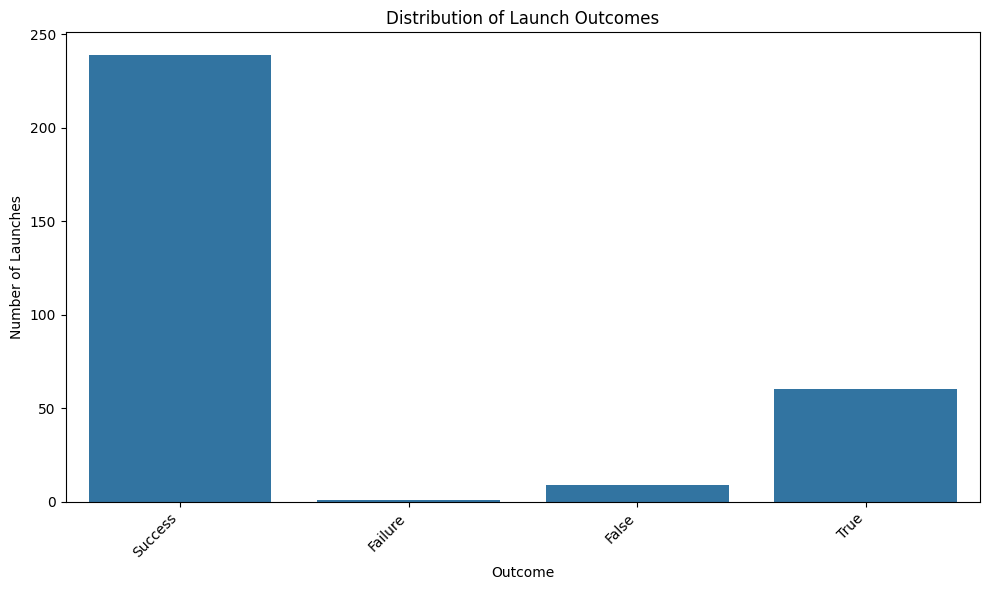

In [ ]:
# Create a bar plot for the outcome of the launches in the combined data
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=combined)
plt.title('Distribution of Launch Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#text to loer case
combined['Outcome'] = combined['Outcome'].astype(str).str.lower()

# map values
combined['Outcome'] = combined['Outcome'].map({
    'success': 1,
    'true': 1,
    'failure': 0,
    'false': 0
})

combined['Outcome'] = pd.to_numeric(combined['Outcome'], errors='coerce')


In [ ]:
combined['LaunchSite'] = combined['LaunchSite'].replace({
    'KSC LC 39A': 'Kennedy',
    'CCSFS SLC 40': 'Cape Canaveral',
    'VAFB SLC 4E': 'Vandenberg'
})


In [ ]:
combined

,Outcome,FlightNumber,PayloadMass,Orbit,Date,LaunchSite
0,1.0,286,16800.0,LEO,2024-01-03,Vandenberg
1,1.0,287,1800.0,GTO,2024-01-03,Cape Canaveral
2,1.0,288,17100.0,LEO,2024-01-07,Cape Canaveral
3,1.0,289,16700.0,LEO,2024-01-14,Vandenberg
4,1.0,290,17100.0,LEO,2024-01-15,Cape Canaveral
...,...,...,...,...,...,...
325,1.0,86,15600.0,VLEO,2020-09-03,Kennedy
326,1.0,87,15600.0,VLEO,2020-10-06,Kennedy
327,1.0,88,15600.0,VLEO,2020-10-18,Kennedy
328,1.0,89,15600.0,VLEO,2020-10-24,Cape Canaveral


# **EDA (Exploratory Data Analysis)**

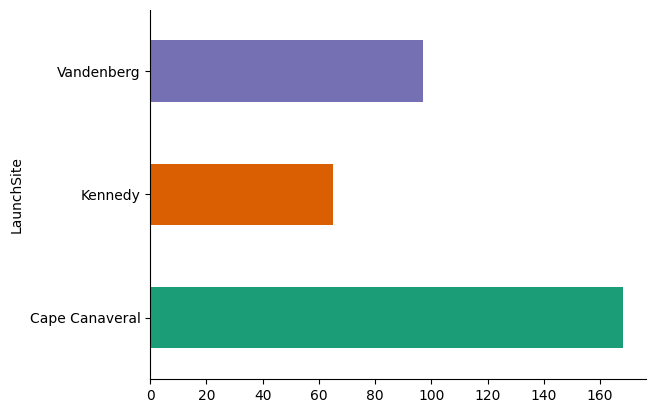

In [ ]:
combined.groupby('LaunchSite').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

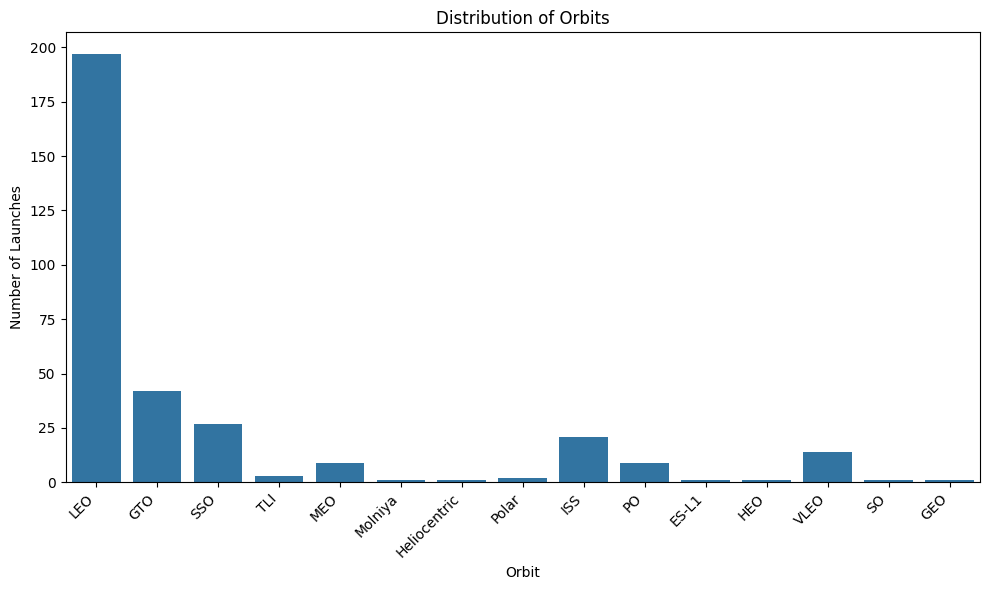

In [ ]:
# Create a bar plot for the distribution of orbits
plt.figure(figsize=(10, 6))
sns.countplot(x='Orbit', data=combined)
plt.title('Distribution of Orbits')
plt.xlabel('Orbit')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
combined['Orbit'].unique()

array(['LEO', 'GTO', 'SSO', 'TLI', 'MEO', 'Molniya', 'Heliocentric',
       'Polar', 'ISS', 'PO', 'ES-L1', 'HEO', 'VLEO', 'SO', 'GEO'],
      dtype=object)

In [ ]:
combined['Orbit'].value_counts()

,count
Orbit,
LEO,197
GTO,42
SSO,27
ISS,21
VLEO,14
MEO,9
PO,9
TLI,3
Polar,2


In [ ]:
landing_outcomes=combined['Outcome'].value_counts()
landing_outcomes

,count
Outcome,
1.0,299
0.0,10


1.0 corresponds to success and 0.0 corresponds to failure

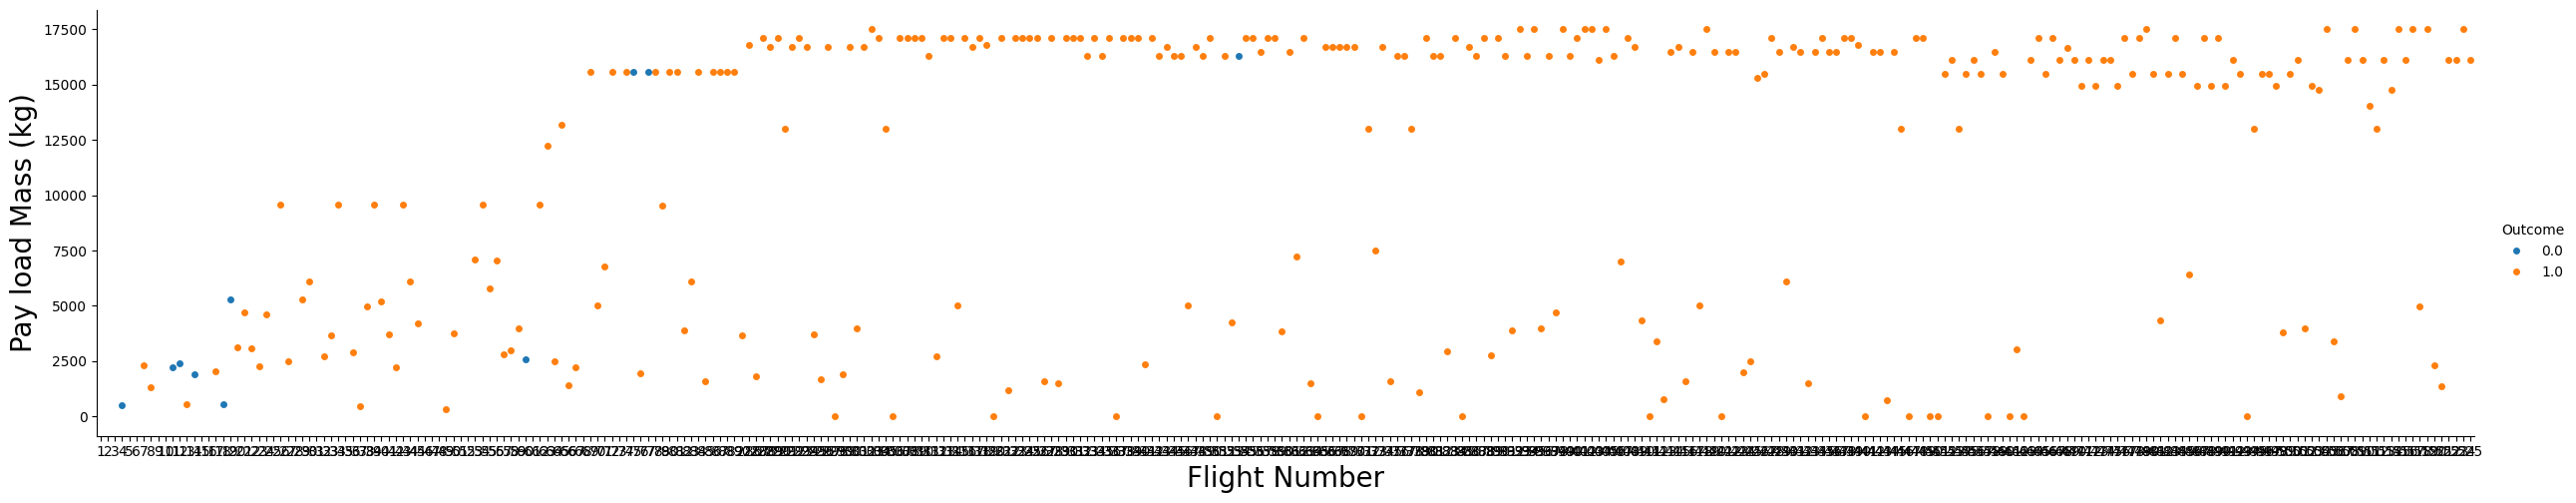

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Outcome", data=combined, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

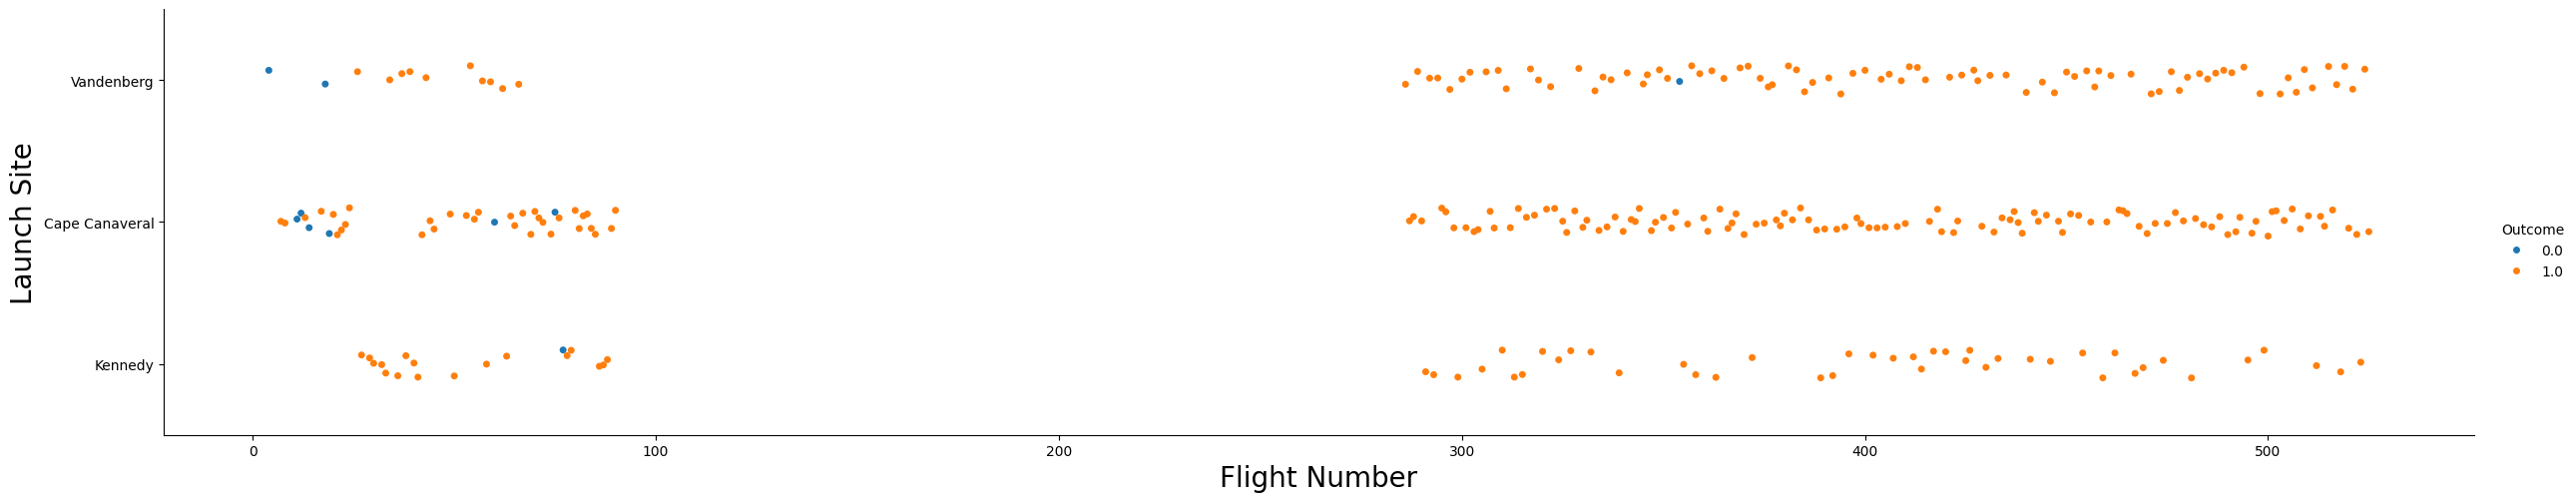

In [ ]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Outcome', data=combined, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

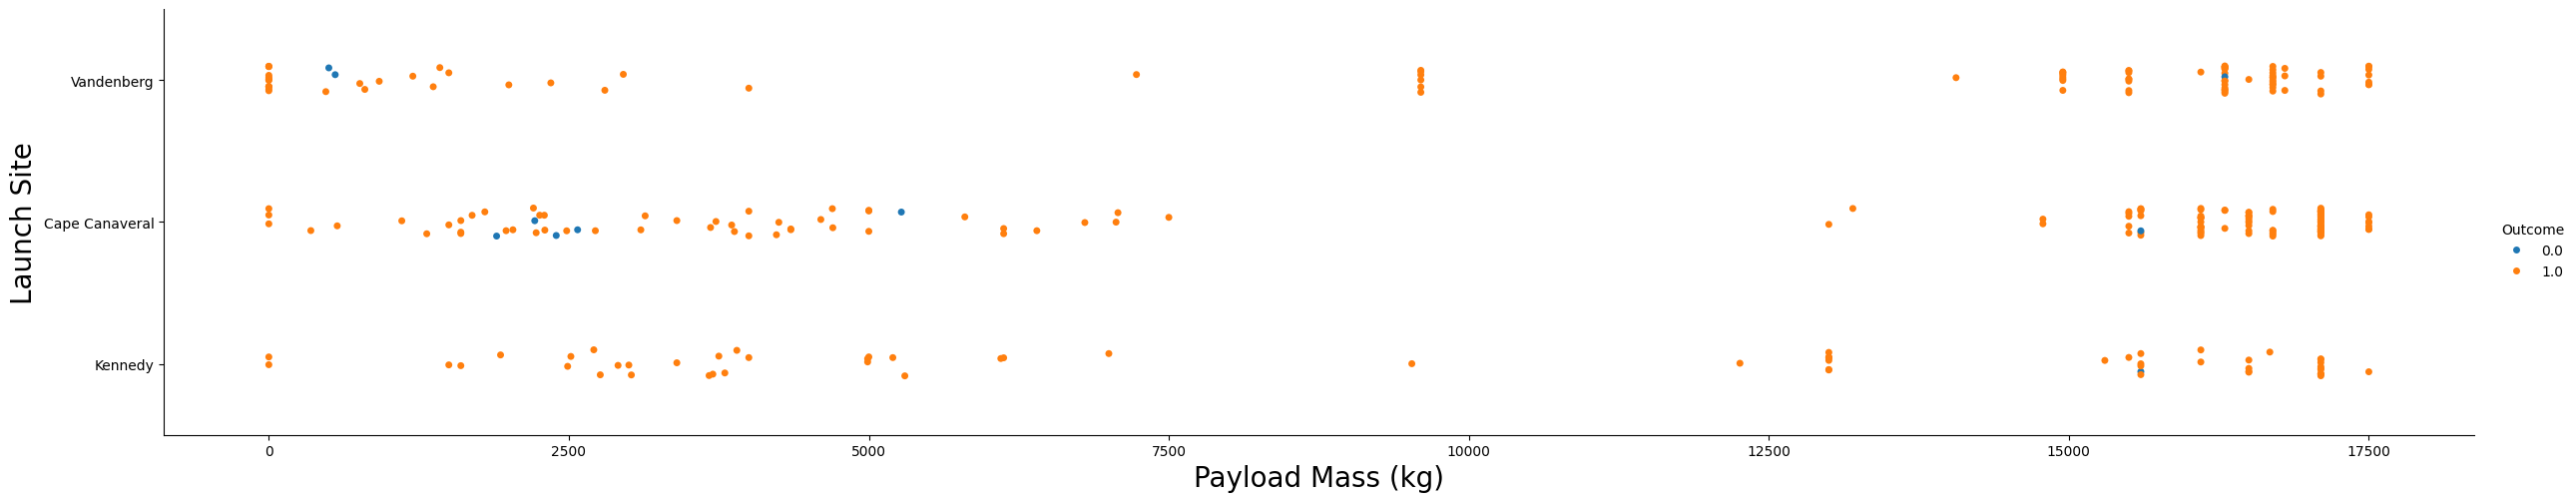

In [ ]:
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Outcome', data=combined, aspect = 5)
plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

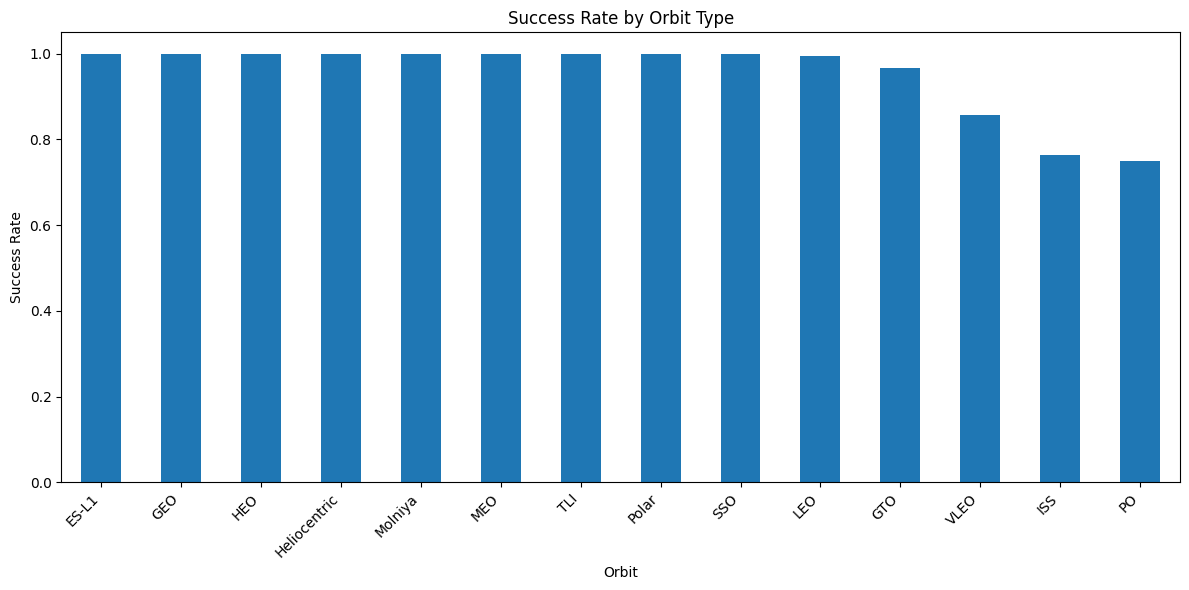

In [ ]:
# Calculate the success rate for each orbit type
orbit_outcome = combined.groupby('Orbit')['Outcome'].value_counts(normalize=True).unstack().fillna(0)

# Plot the success rate for each orbit type
plt.figure(figsize=(12, 6))
orbit_outcome[1.0].sort_values(ascending=False).plot(kind='bar')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

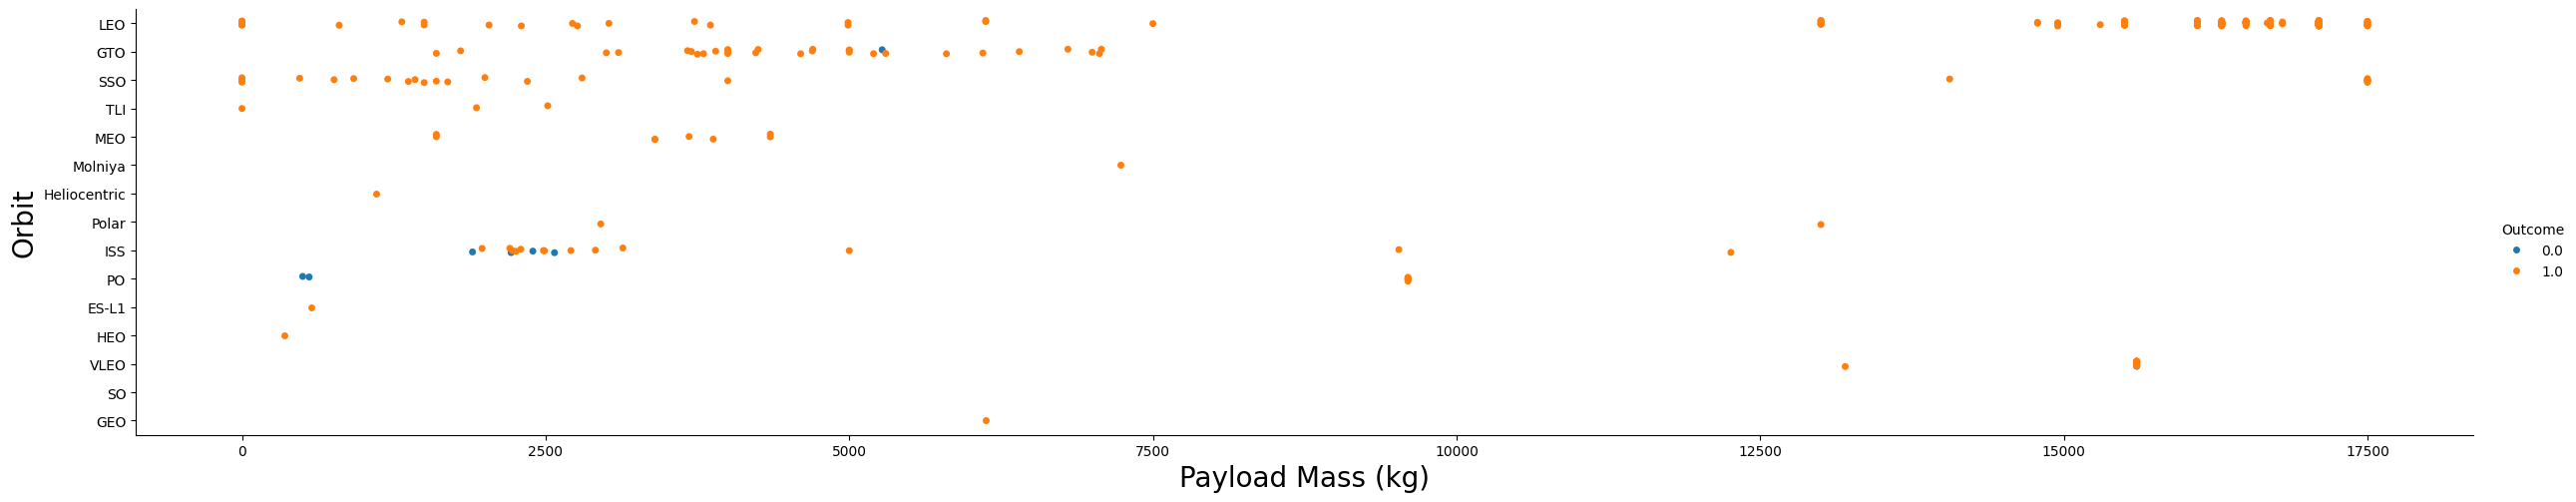

In [ ]:
sns.catplot(x = 'PayloadMass', y = 'Orbit', hue = 'Outcome', data = combined, aspect = 5)
plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

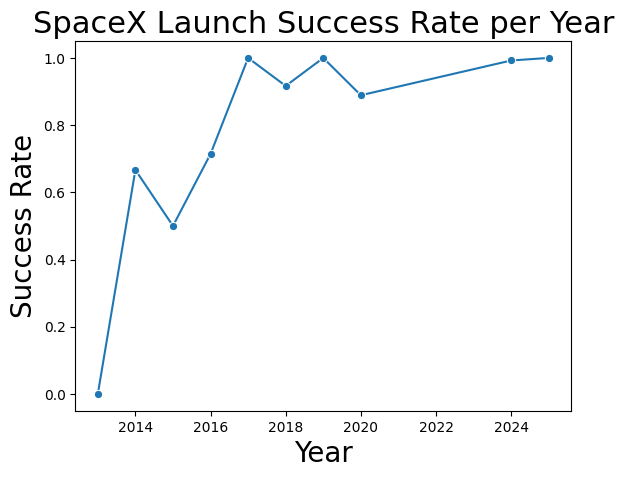

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
combined['Year'] = pd.to_datetime(combined['Date']).dt.year
years = combined.groupby('Year')['Outcome'].mean()

sns.lineplot(x=years.index, y=years.values, marker='o')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.title('SpaceX Launch Success Rate per Year', fontsize=22)
plt.show()

# **Feature Engineering**

In [ ]:
combined = pd.get_dummies(combined, columns=['Orbit', 'LaunchSite'])


In [ ]:
combined.head()

,Outcome,FlightNumber,PayloadMass,Date,Year,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_Heliocentric,...,Orbit_Molniya,Orbit_PO,Orbit_Polar,Orbit_SO,Orbit_SSO,Orbit_TLI,Orbit_VLEO,LaunchSite_Cape Canaveral,LaunchSite_Kennedy,LaunchSite_Vandenberg
0,1.0,286,16800.0,2024-01-03,2024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,287,1800.0,2024-01-03,2024.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,288,17100.0,2024-01-07,2024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,289,16700.0,2024-01-14,2024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1.0,290,17100.0,2024-01-15,2024.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# **Model Training**

Importing necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [ ]:
combined.isnull().sum()

,0
Outcome,21
FlightNumber,0
PayloadMass,0
Date,1
Year,1
Orbit_ES-L1,0
Orbit_GEO,0
Orbit_GTO,0
Orbit_HEO,0
Orbit_Heliocentric,0


In [ ]:
combined[combined['Date'].isna()]


,Outcome,FlightNumber,PayloadMass,Date,Year,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_Heliocentric,...,Orbit_Molniya,Orbit_PO,Orbit_Polar,Orbit_SO,Orbit_SSO,Orbit_TLI,Orbit_VLEO,LaunchSite_Cape Canaveral,LaunchSite_Kennedy,LaunchSite_Vandenberg
106,1.0,392,3900.0,NaT,NaN,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
combined = combined.dropna(subset=['Date'])


In [ ]:
combined['Outcome'] = combined['Outcome'].fillna(0).astype(int)


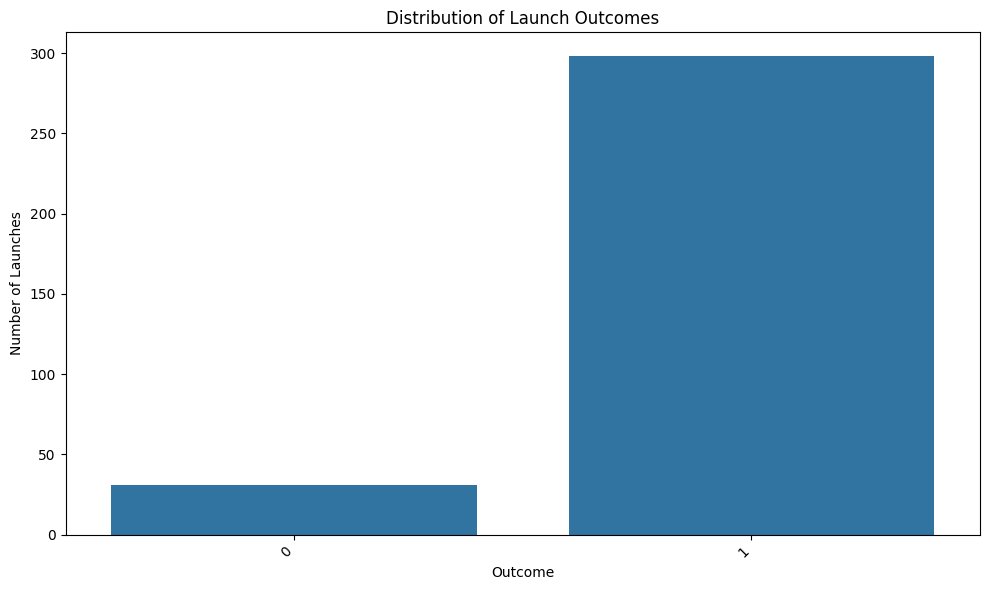

In [ ]:
# Create a bar plot for the outcome of the launches in the combined data
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=combined)
plt.title('Distribution of Launch Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
combined.duplicated().sum()


np.int64(0)

In [ ]:
# Feature engineering from Date
combined['Year'] = combined['Date'].dt.year
combined['Month'] = combined['Date'].dt.month

In [ ]:
X = combined.drop(columns=['Outcome','Date'])

y = combined['Outcome']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Before resampling:")
print(y_train.value_counts(normalize=True))

# Handling class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE resampling:")
print(y_train_res.value_counts(normalize=True))

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


Before resampling:
Outcome
1    0.904943
0    0.095057
Name: proportion, dtype: float64

After SMOTE resampling:
Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64


# **Logistic Regression**

In [ ]:
# Logistic Regression + SMOTE
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         6
           1       0.96      0.90      0.93        60

    accuracy                           0.88        66
   macro avg       0.68      0.78      0.72        66
weighted avg       0.91      0.88      0.89        66



In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8787878787878788


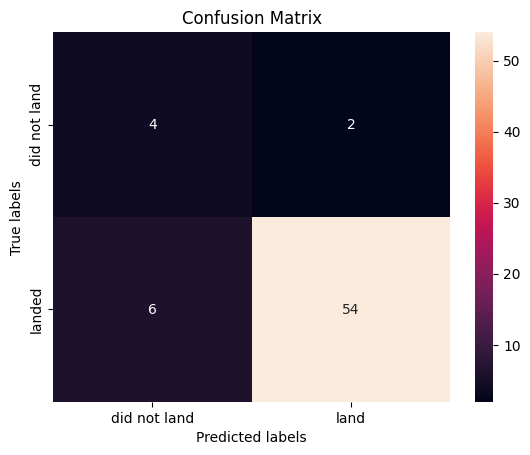

In [ ]:
plot_confusion_matrix(y_test,y_pred)

# **SCV**

In [ ]:
# Define model
svm = SVC(probability=True)

# Define parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

In [ ]:
# Grid Search with 10-fold CV
svm_cv = GridSearchCV(svm, parameters, cv=10, scoring='f1', n_jobs=-1)
svm_cv.fit(X_train_res, y_train_res)

# Best parameters
print("Best Parameters:", svm_cv.best_params_)
print("Best Score:", svm_cv.best_score_)


Best Parameters: {'C': np.float64(31.622776601683793), 'gamma': np.float64(0.001), 'kernel': 'linear'}
Best Score: 0.9450208274098191


In [ ]:
from sklearn.metrics import  roc_auc_score

y_pred_svc = svm_cv.predict(X_test)
y_pred_prob_svc = svm_cv.predict_proba(X_test)[:, 1]

print("Accuracy:\n",accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_svc))

Accuracy:
 0.8787878787878788

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.95      0.92      0.93        60

    accuracy                           0.88        66
   macro avg       0.66      0.71      0.68        66
weighted avg       0.90      0.88      0.89        66

ROC-AUC Score: 0.7972222222222222


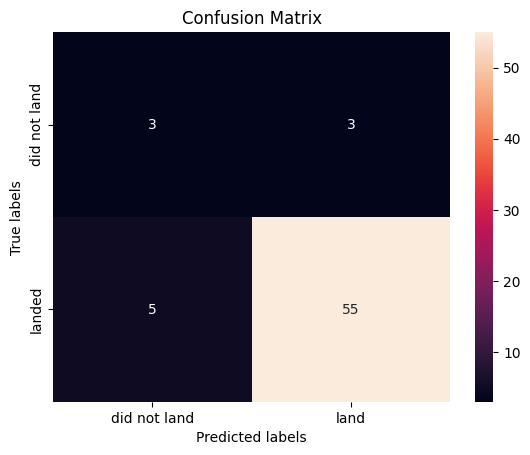

In [ ]:
plot_confusion_matrix(y_test,y_pred_svc)

# **Decision Tree**

In [ ]:
# Define the model
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],          # limit depth
    'min_samples_split': [2, 5, 10],        # min samples to split
    'min_samples_leaf': [1, 2, 4],          # min samples in a leaf
    'criterion': ['gini', 'entropy']        # splitting criteria
}

In [ ]:
# Grid Search with 10-fold CV
dt_cv = GridSearchCV(dt, param_grid, cv=10, scoring='f1', n_jobs=-1)
dt_cv.fit(X_train_res, y_train_res)

# Best parameters
print("Best Parameters:", dt_cv.best_params_)
print("Best CV F1 Score:", dt_cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV F1 Score: 0.9458956246798931


In [ ]:
# Evaluate on test set
y_pred_dt = dt_cv.predict(X_test)
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.92      0.97      0.94        60

    accuracy                           0.89        66
   macro avg       0.63      0.57      0.58        66
weighted avg       0.87      0.89      0.88        66

Accuracy: 0.8939393939393939


# **Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
rf_cv = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rf_cv.fit(X_train_res, y_train_res)

print("Best Params:", rf_cv.best_params_)
print("Best CV Score:", rf_cv.best_score_)


Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Best CV Score: 0.9488237548073967


In [ ]:
y_pred_rf = rf_cv.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_cv.predict_proba(X_test)[:,1]))

Accuracy: 0.9090909090909091

Confusion Matrix:
 [[ 4  2]
 [ 4 56]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.97      0.93      0.95        60

    accuracy                           0.91        66
   macro avg       0.73      0.80      0.76        66
weighted avg       0.92      0.91      0.91        66

ROC-AUC Score: 0.9486111111111111


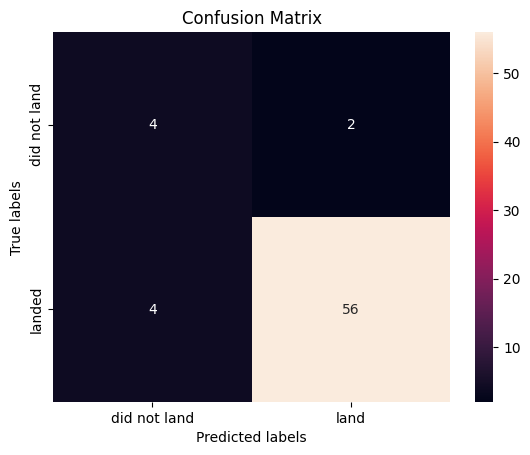

In [ ]:
plot_confusion_matrix(y_test,y_pred_rf)

# **Interactive Visual Analytics**

In [ ]:
!pip3 install folium

In [ ]:
import folium

In [ ]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium DivIcon plugina
from folium.features import DivIcon

In [ ]:
df2.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [ ]:
spacex_df = df2[['LaunchSite', 'Latitude', 'Longitude', 'Outcome']]
launch_sites_df = df2.groupby(['LaunchSite'], as_index=False).first()
launch_sites_df = launch_sites_df[['LaunchSite', 'Latitude', 'Longitude']]
launch_sites_df

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829


In [ ]:
# Create base map centered around average coordinates
map_spacex = folium.Map(
    location=[launch_sites_df['Latitude'].mean(), launch_sites_df['Longitude'].mean()],
    zoom_start=4
)

# Add MarkerCluster
marker_cluster = MarkerCluster().add_to(map_spacex)

# Add markers + text labels
for i, row in launch_sites_df.iterrows():
    # Marker
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['LaunchSite'],
        icon=folium.Icon(color='blue', icon='rocket', prefix='fa')
    ).add_to(marker_cluster)

    # Text label (DivIcon)
    folium.map.Marker(
        [row['Latitude'], row['Longitude']],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 10pt; color: red">{row["LaunchSite"]}</div>'
        )
    ).add_to(map_spacex)

# Add MousePosition (shows lat/lon under cursor)
MousePosition().add_to(map_spacex)

# Show map
map_spacex


In [ ]:
# Create base map centered around average coordinates
map_launches = folium.Map(
    location=[spacex_df['Latitude'].mean(), spacex_df['Longitude'].mean()],
    zoom_start=4
)

# Loop through each launch and place a marker
for i, row in spacex_df.iterrows():
    # Pick marker color based on outcome
    color = 'green' if row['Outcome'] == 1 else 'red'

    # Add marker
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Site: {row['LaunchSite']}<br>Outcome: {'Success' if row['Outcome']==1 else 'Failure'}",
        icon=folium.Icon(color=color, icon='rocket', prefix='fa')
    ).add_to(map_launches)

# Show map
map_launches


In [ ]:
# Create base map
map_launches = folium.Map(
    location=[spacex_df['Latitude'].mean(), spacex_df['Longitude'].mean()],
    zoom_start=5
)

# Add MarkerCluster
marker_cluster = MarkerCluster().add_to(map_launches)

# Add markers for each launch
for i, row in spacex_df.iterrows():
    color = 'green' if row['Outcome'] == 1 else 'red'

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Site: {row['LaunchSite']}<br>Outcome: {'Success' if row['Outcome']==1 else 'Failure'}",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(marker_cluster)

# Show map
map_launches

# **Dashboard using Plotly Dash**

In [ ]:
# Install necessary packages
!pip install dash==2.13.0 plotly pandas

In [ ]:
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
df = pd.read_csv("Data_from_api.csv")

# must ensure that the outcome is numeric
if df['Outcome'].dtype == object:
    df['Outcome'] = df['Outcome'].map({'Success': 1, 'Failure': 0})

# Initialize the app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("SpaceX Launch Dashboard", style={'textAlign': 'center'}),

    # Dropdown for launch site selection
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in df['LaunchSite'].unique()] +
                [{'label': 'All Sites', 'value': 'ALL'}],
        value='ALL',
        placeholder="Select a Launch Site"
    ),

    # Pie chart
    dcc.Graph(id='success-pie-chart'),

    # Payload slider
    dcc.RangeSlider(
        id='payload-slider',
        min=df['PayloadMass'].min(),
        max=df['PayloadMass'].max(),
        step=1000,
        value=[df['PayloadMass'].min(), df['PayloadMass'].max()],
        marks={int(i): str(int(i)) for i in range(int(df['PayloadMass'].min()), int(df['PayloadMass'].max())+1, 5000)}
    ),

    # Scatter plot
    dcc.Graph(id='success-payload-scatter')
])

# Callback for pie chart
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def update_pie(selected_site):
    if selected_site == 'ALL':
        # Count total successful launches per site
        success_counts = df[df['Outcome'] == 1].groupby('LaunchSite').size().reset_index(name='count')
        fig = px.pie(success_counts, names='LaunchSite', values='count',
                     title='Total Successful Launches by Site')
    else:
        filtered_df = df[df['LaunchSite'] == selected_site]
        outcome_counts = filtered_df['Outcome'].value_counts().reset_index()
        outcome_counts.columns = ['Outcome', 'count']
        outcome_counts['Outcome'] = outcome_counts['Outcome'].map({1: 'Success', 0: 'Failure'})
        fig = px.pie(outcome_counts, names='Outcome', values='count',
                     title=f'Success vs Failure for {selected_site}')
    return fig

# Callback for scatter plot
@app.callback(
    Output('success-payload-scatter', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter(selected_site, payload_range):
    low, high = payload_range
    filtered_df = df[(df['PayloadMass'] >= low) & (df['PayloadMass'] <= high)]

    if selected_site != 'ALL':
        filtered_df = filtered_df[filtered_df['LaunchSite'] == selected_site]

    fig = px.scatter(
        filtered_df,
        x='PayloadMass',
        y='Outcome',
        color='Orbit',
        title='Payload vs Outcome by Orbit',
        labels={'Outcome': 'Launch Outcome'}
    )
    return fig

# Run the app in Colab
app.run_server(debug=True, use_reloader=False)


<IPython.core.display.Javascript object>